<a href="https://colab.research.google.com/github/PrasadPrabash/gully-cricket-score-board/blob/master/Day4_SalaryEstimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
E: Package 'libfluidsynth1' has no installation candidate
Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 128126 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Processing triggers for man-db (2.9.1-1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 KB 10.4 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31648 sha256=457aceabe701eedc284d607d33c2ab6574706294320098fdda1c533c5331f785
  Stored in directory: /root/.cache/pip/wheels/e2/96/fb/b17d6b9adb7c223428b4c77d9e8bc29f40a51d625389b7346

In [ ]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 71.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 4.0 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp38-cp38-linux_x86_64.whl size=11127990 sha256=dbb6ad24c592c25c168ff60fa59483f2e02962b5324c71ae38534dee0a28e3ad
  Stored in directory: /root/.cache/pip/wheels/7c/ff/6f/09e4aa53f4e67d6498ef1d33dd4ea9c8c165817b9ddcc31d28
Successfully built cartopy


In [ ]:
from google.colab import files
upload = files.upload()
dataset = pd.read_csv('salary.csv')

Saving salary.csv to salary.csv


In [ ]:
print(dataset.shape)
print(dataset.head(5))

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K


Mapping Salary Data to Binary Value

In [ ]:
income_set = set(dataset['income'])
dataset['income']= dataset['income'].map({'<=50K':0, '>50K':1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


Segregate Dataset into X

In [ ]:
X = dataset.iloc[:, :-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]])

In [ ]:
Y = dataset.iloc[:,-1].values

In [ ]:
Y


array([0, 0, 0, ..., 1, 0, 0])

Split the data into train and Set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Find the K value

Text(0, 0.5, 'Mean Error')

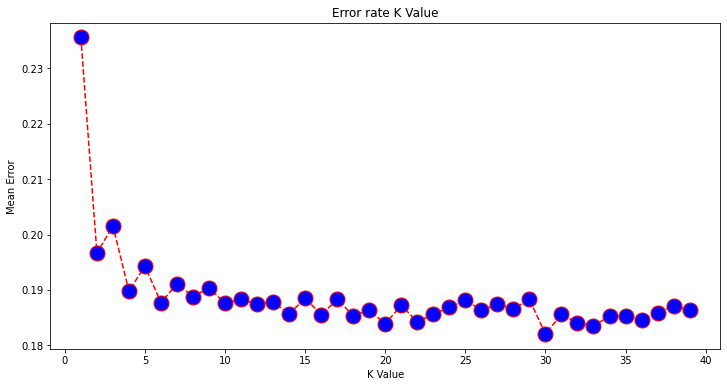

In [ ]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

for i in range (1,40):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)
  pred_i = model.predict(X_test)
  error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color ='red', linestyle ='dashed', marker='o', markerfacecolor='blue', markersize =15 )
plt.title('Error rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors= 3, metric ='minkowski', p=2 )
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Predicting, wheather new customer with age & salary will buy or not

In [ ]:

age = int(input("Enter New Employee's Age: "))
edu = int(input("Enter New Employee's Education: "))
cg = int(input("Enter New Employee's Captital Gain: "))
wh = int(input("Enter New Employee's Hour's Per week: "))
newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
  print("Employee might got Salary above 50K")
else:
  print("Customer might not got  Salary above 50K")

KeyboardInterrupt: ignored

In [ ]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 0]
 [0 0]
 [0 0]]


EvaluationModel

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)
print ("Accuracy of the Model: {0}%".format(accuracy_score(y_test,y_pred)*100))


Confusion Matrix: 
[[5585  608]
 [1033  915]]
Accuracy of the Model: 79.84277115833436%
